# FRANCISCO SILVA - Desafío - Árboles de regresión

Requerimientos

- Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.
- Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable <code>S​ale_Price</code>​.

## Ejercicio 1: Preparación del ambiente de trabajo

- Importe las librerías clásicas a utilizar.
- Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la clase ​DecisionTreeRegressor​.
- De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión, división de muestras y búsqueda de grilla con validación cruzada.
- Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.28 s (started: 2021-10-24 10:25:23 -03:00)


In [3]:
path_colab = "/content/drive/MyDrive/Data Scientist/Desafío Latam/3 .-Machine Learning/4 .-Algoritmos de ensamble (I)/Desafíos/ames_housing.csv"
path_casita = "ames_housing.csv"

df = pd.read_csv(path_casita).drop(columns = "Unnamed: 0")

df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


time: 47 ms (started: 2021-10-24 10:07:33 -03:00)


# Ejercicio 2: Feature engineering

- Identifique si el ​dtype de cada ​pd.Serie en nuestra base de datos se considera 'object'​ o no. Para todas las variables que sean ​'object'​, realice lo siguiente:
  - Genere una recodificación k − 1 en cada variable. Para efectos prácticos sólo necesitan eliminar una de las categorías, no se concentren en especificar la categoría a eliminar. Pueden utilizar la función pd.get_dummies con la opción ​drop_first para ello.
  - Utilizando el método ​pd.concat​, concatene a los atributos creados en la base de datos.
  Tip: No se olvide de eliminar los atributos recodificados, de esta forma evitará un
  aumento artificial del desempeño del modelo.

In [4]:
df = pd.get_dummies(df, drop_first=True)

time: 47 ms (started: 2021-10-24 10:09:00 -03:00)


In [20]:
df.shape

(2930, 307)

time: 0 ns (started: 2021-10-24 10:20:02 -03:00)


# Ejercicio 3: Primer modelo

- Genere muestras de entrenamiento y validación con 'Sale_Price' como vector objetivo y los atributos de la base de datos como matriz.
- Recuerde definir el porcentaje de casos en la muestra de validación y una semilla pseudoaleatoria.
- Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin modificar los hiper parámetros. Reporte las principales métricas de desempeño.
- Comente sobre el desempeño.

In [5]:
X = df.drop(columns = 'Sale_Price')
y = df.Sale_Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

time: 15 ms (started: 2021-10-24 10:11:30 -03:00)


In [9]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

time: 63 ms (started: 2021-10-24 10:13:34 -03:00)


In [16]:
resultados = pd.DataFrame()

resultados = resultados.append(
    {'Modelo':"dt",
     "MAE":mean_absolute_error(y_test,y_pred),
     "MSE":mean_squared_error(y_test,y_pred),
     "R2":r2_score(y_test,y_pred)
    },
ignore_index=True
)
#mean_absolute_error, mean_squared_error, r2_score

resultados

,MAE,MSE,Modelo,R2
0,25254.392968,1.634219e+09,dt,0.734276


time: 15 ms (started: 2021-10-24 10:17:22 -03:00)


**Comentarios**

Tanto el MAE como el MSE servirá mejor compararlos con otros modelos, pero notamos que tenemos un r2 por sobre el 70%, el cual no es "muy bueno".

# Ejercicio 4: Importancia relativa

- Implemente el método ​plot_importance utilizado en la lectura para reportar la importancia relativa de los atributos.
- Comente sobre cuáles son los principales 10 atributos que afectan la predicción de Sale_Price​.
- Separe estos 10 atributos en una nueva base de datos, junto con el vector objetivo.

In [28]:
#Haremos nuestro propio plot_importance en base al atributo feature_importance_ de nuestro árbol de decisión.

plot_importance = pd.Series(dt.feature_importances_, index = X.columns).sort_values(ascending = False)
plot_importance.head()

Garage_Cars                  0.381725
Total_Bsmt_SF                0.132244
Year_Built                   0.128787
Gr_Liv_Area                  0.117247
Fireplace_Qu_No_Fireplace    0.049018
dtype: float64

time: 0 ns (started: 2021-10-24 10:24:57 -03:00)


<AxesSubplot:>

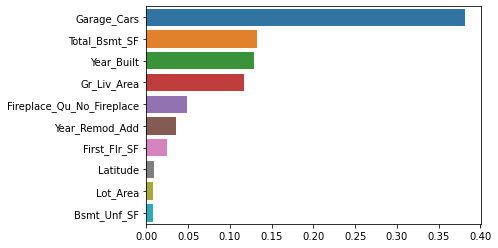

time: 125 ms (started: 2021-10-24 10:26:08 -03:00)


In [33]:
sns.barplot(x = plot_importance.values[0:10], y = plot_importance.index[0:10])

**Comentarios**

Las 10 variables que **el modelo** encontró como más importantes para generar el árbol de decisión son:
- Capacidad de autos para guardar en el garage de la casa
- Total de BSMT_SF
- El año de construcción
- Cantidad de áreas verdes
- Fireplace_Qu_No_Fireplace
- Año de remodelación del hogar
- First_Flr_SF
- Latitud(coordenada de la ubicación)
- Lot_Area
- Bsmt_Unsf_SD

In [111]:
lista_eje4 = list(plot_importance.index[0:10]) + ['Sale_Price']
lista_eje4

['Garage_Cars',
 'Total_Bsmt_SF',
 'Year_Built',
 'Gr_Liv_Area',
 'Fireplace_Qu_No_Fireplace',
 'Year_Remod_Add',
 'First_Flr_SF',
 'Latitude',
 'Lot_Area',
 'Bsmt_Unf_SF',
 'Sale_Price']

time: 0 ns (started: 2021-10-24 10:49:34 -03:00)


In [113]:
df_eje4 = df[lista_eje4]
df_eje4.head()

,Garage_Cars,Total_Bsmt_SF,Year_Built,Gr_Liv_Area,Fireplace_Qu_No_Fireplace,Year_Remod_Add,First_Flr_SF,Latitude,Lot_Area,Bsmt_Unf_SF,Sale_Price
0,2,1080,1960,1656,0,1960,1656,42.054035,31770,441,215000
1,1,882,1961,896,1,1961,896,42.053014,11622,270,105000
2,1,1329,1958,1329,1,1958,1329,42.052659,14267,406,172000
3,2,2110,1968,2110,0,1968,2110,42.051245,11160,1045,244000
4,2,928,1997,1629,0,1998,928,42.060899,13830,137,189900


time: 16 ms (started: 2021-10-24 10:49:45 -03:00)


# Ejercicio 5: Refactorización del modelo y pickling

- En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar conjuntos de entrenamiento y validación.
- Dentro de los datos de entrenamiento genere una búsqueda de grilla con GridSearchCV utilizando los siguientes hiperparámetros:
  - Máximo de atributos: Evalúe todos los posibles atributos.
  - Máximo de profundidad: Entre 1 a 32.
  - Validaciones cruzadas: 5.
- Reporte la mejor combinación de hiperparámetros y su desempeño asociado. Compare el desempeño en la muestra de validación con el modelo por defecto.

**Pickling**

- Ahora generamos una serialización de nuestro modelo depurado, y nuestros conjuntos de entrenamiento y validación depurados. Para ello importe el módulo <code>pickle</code>.
-  pickle contiene la función dump, que permite guardar el modelo desarrollado. La forma canónica para desarrollar el pickling es:

<code> pickle.dump(<OBJETO_CON_EL_MODELO>, open('nombre-apellido-actividad07.sav', 'wb'))</code>


In [116]:
X = df_eje4.drop(columns = 'Sale_Price')
y = df_eje4.Sale_Price

X_train, X_test, y_train, y_test, = train_test_split(X, y , test_size=0.33, random_state=123)

time: 0 ns (started: 2021-10-24 10:54:37 -03:00)


In [119]:
params = {"max_depth":np.linspace(1,32,32)} # No se especificó max_feature dado que por defecto el modelo selecciona todos los posibles

grid = GridSearchCV(DecisionTreeRegressor(), param_grid = params, cv=5).fit(X_train, y_train)

time: 1.49 s (started: 2021-10-24 11:06:25 -03:00)


In [124]:
print(f"La mejor combinación de parámetros fue: {grid.best_params_}, con un desempeño squared_error de {grid.best_score_.round(2)}")

La mejor combinación de parámetros fue: {'max_depth': 6.0}, con un desempeño squared_error de 0.79
time: 0 ns (started: 2021-10-24 11:12:07 -03:00)


In [125]:
y_pred = grid.predict(X_test)

resultados = resultados.append(
    {'Modelo':"grid_dt",
     "MAE":mean_absolute_error(y_test,y_pred),
     "MSE":mean_squared_error(y_test,y_pred),
     "R2":r2_score(y_test,y_pred)
    },
ignore_index=True
)
#mean_absolute_error, mean_squared_error, r2_score

resultados

,MAE,MSE,Modelo,R2
0,25254.392968,1.634219e+09,dt,0.734276
1,24343.869264,1.438856e+09,grid_dt,0.766042


time: 0 ns (started: 2021-10-24 11:13:44 -03:00)


**Comentario**

Tanto el MAE con el MSE bajaron, por tanto el desempeño mejoró al tomar sólo los 10 atributos más importantes acorde al criterio del primero árbol de decision(modelo dt), así mismo, el r2 mejoró de 0.73 a 0.76 aprox, mejorando sustancialmente.

In [126]:
import pickle

time: 0 ns (started: 2021-10-24 11:16:18 -03:00)


In [127]:
pickle.dump(grid, open('Francisco-Silva-actividad07.sav', 'wb'))

time: 0 ns (started: 2021-10-24 11:17:16 -03:00)
